In [ ]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

(x_train,y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

input_layer = Input(shape=(32,32,3))

x = Flatten()(input_layer)

x = Dense(units=200, activation = 'relu')(x)
x = Dense(units=150, activation = 'relu')(x)

output_layer = Dense(units=10, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam

opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy',optimizer=opt,
              metrics='accuracy')


In [ ]:
model.fit(x_train, y_train, batch_size =32,
          epochs= 10 , shuffle = True)
classes = np.array(['airplane','automobile','bird','cat','deer',
                    'dog','frog','horse','ship','truck'])

preds = model.predict(x_test)
preds_single = classes[np.argmax(preds, axis=-1)]
actual_single = classes[np.argmax(y_test, axis=-1)]

Epoch 1/10
1563/1563 [==============================] - 7s 2ms/step - loss: 1.9608 - accuracy: 0.2880
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6790 - accuracy: 0.3934
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5952 - accuracy: 0.4309
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5355 - accuracy: 0.4515
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4925 - accuracy: 0.4674
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4609 - accuracy: 0.4816
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4416 - accuracy: 0.4853
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4180 - accuracy: 0.4939
Epoch 9/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3903 - accuracy: 0.5037
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.379

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5527 - accuracy: 0.4520


[1.552701711654663, 0.4519999921321869]

In [ ]:
classes = np.array(['airplane','automobile','bird','cat','deer',
                    'dog','frog','horse','ship','truck'])

preds = model.predict(x_test)
preds_single = classes[np.argmax(preds, axis=-1)]
actual_single = classes[np.argmax(y_test, axis=-1)]

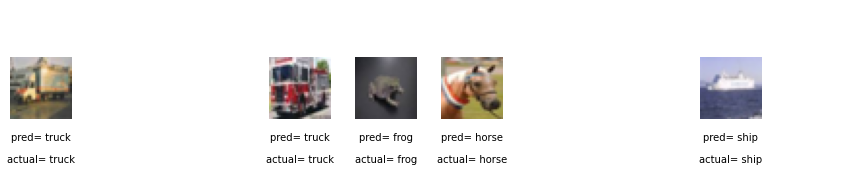

In [ ]:
import matplotlib.pyplot as plt

n_to_show = 10 #고르는 갯수 = X개중에 n_to_show개 
indices = np.random.choice(range(len(x_test)),n_to_show)

fig = plt.figure(figsize = (15,3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show , i+1)
  ax.axis('off')
  if str(preds_single[idx]) == str(actual_single[idx]):
    ax.text(0.5, -0.35, 'pred= ' + str(preds_single[idx]), fontsize = 10,
          ha='center', transform=ax.transAxes)
    ax.text(0.5,-0.7,'actual= ' +str(actual_single[idx]), fontsize = 10,
          ha='center', transform=ax.transAxes)
    ax.imshow(img)

In [ ]:
from tensorflow import keras
from keras.layers import Conv2D
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D( filters = 10, kernel_size=(4,4),
                      strides = 2, padding = 'same')(input_layer)

conv_layer_2 = Conv2D( filters = 20, kernel_size=(3,3),
                      strides = 2, padding = 'same')(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)


In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.layers import BatchNormalization , Dropout , LeakyReLU , Softmax

input_layer = Input((32,32,3))

x = Conv2D( filters = 32, kernel_size=3,
                      strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D( filters = 32, kernel_size=3,
                      strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D( filters = 64, kernel_size=3,
                      strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D( filters = 64, kernel_size=3,
                      strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Softmax()(x)
model = Model(input_layer, output_layer)


In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_12 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 16, 16, 32)        0   

In [ ]:
model.compile(loss='categorical_crossentropy', metrics='accuracy',
              optimizer=opt)
model.fit(x_train, y_train, batch_size =100,
          epochs= 10 , shuffle = True)

classes = np.array(['airplane','automobile','bird','cat','deer',
                    'dog','frog','horse','ship','truck'])


print(model.evaluate(x_test,y_test, batch_size=1000))



Epoch 1/10
500/500 [==============================] - 5s 9ms/step - loss: 0.3201 - accuracy: 0.8909
Epoch 2/10
500/500 [==============================] - 4s 9ms/step - loss: 0.2733 - accuracy: 0.9048
Epoch 3/10
500/500 [==============================] - 4s 9ms/step - loss: 0.2580 - accuracy: 0.9102
Epoch 4/10
500/500 [==============================] - 4s 9ms/step - loss: 0.2530 - accuracy: 0.9115
Epoch 5/10
500/500 [==============================] - 4s 9ms/step - loss: 0.2410 - accuracy: 0.9136
Epoch 6/10
500/500 [==============================] - 4s 9ms/step - loss: 0.2467 - accuracy: 0.9133
Epoch 7/10
500/500 [==============================] - 4s 9ms/step - loss: 0.2264 - accuracy: 0.9191
Epoch 8/10
500/500 [==============================] - 4s 9ms/step - loss: 0.2202 - accuracy: 0.9197
Epoch 9/10
500/500 [==============================] - 4s 9ms/step - loss: 0.2145 - accuracy: 0.9223
Epoch 10/10
10/10 [==============================] - 1s 22ms/step - loss: 1.0104 - accuracy: 0.7403


0


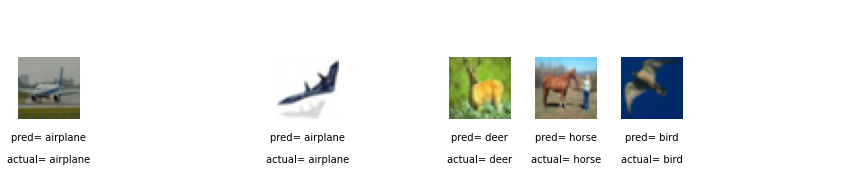

In [46]:
# 모델중에서 맞춘사진 고르기 
def model_picture(astral,n_to_show):
#astral = model , n_to_show = number to show in random 
  preds = astral.predict(x_test)
  preds_single = classes[np.argmax(preds, axis=-1)]
  actual_single = classes[np.argmax(y_test, axis=-1)]
  indices = np.random.choice(range(len(x_test)),n_to_show)

  fig = plt.figure(figsize = (15,3))
  fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

  for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show , i+1)
    ax.axis('off')
    if str(preds_single[idx]) == str(actual_single[idx]):
      ax.text(0.5, -0.35, 'pred= ' + str(preds_single[idx]), fontsize = 10,
              ha='center', transform=ax.transAxes)
      ax.text(0.5,-0.7,'actual= ' +str(actual_single[idx]), fontsize = 10,
              ha='center', transform=ax.transAxes)
      ax.imshow(img)

model_picture(model,10)